In [15]:
from skimage import io
from skimage.feature import (
    corner_peaks,
    corner_harris,
    BRIEF, 
    SIFT
)
from skimage.color import rgb2gray

im1 = rgb2gray(io.imread("scis1.jpeg"))
im2 = rgb2gray(io.imread("scis2.jpeg"))

extractor = BRIEF()
keypoints1 = corner_peaks(corner_harris(im1), threshold_rel=0.001, min_distance=5)
keypoints2 = corner_peaks(corner_harris(im2), threshold_rel=0.001, min_distance=5)

extractor.extract(im1, keypoints1)
keypoints1 = keypoints1[extractor.mask]
descriptors1 = extractor.descriptors

extractor.extract(im2, keypoints2)
keypoints2 = keypoints2[extractor.mask]
descriptors2 = extractor.descriptors

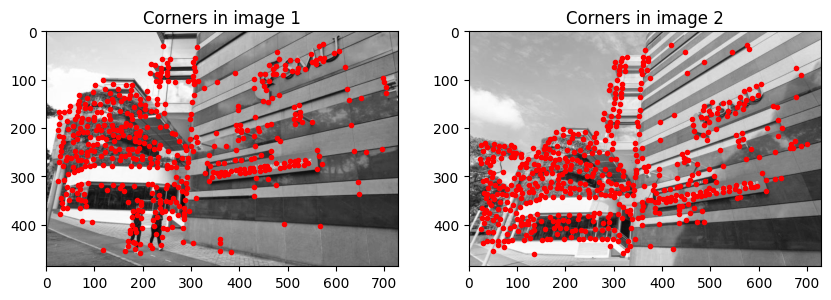

In [18]:
import matplotlib.pyplot as plt

# Display the image and plot all the detected corners
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(im1, cmap='gray')
plt.plot(keypoints1[:, 1], keypoints1[:, 0], 'r.')
plt.axis((0, im1.shape[1], im1.shape[0], 0))
plt.title('Corners in image 1')

plt.subplot(1, 2, 2)
plt.imshow(im2, cmap='gray')

plt.plot(keypoints2[:, 1], keypoints2[:, 0], 'r.')
plt.axis((0, im2.shape[1], im2.shape[0], 0))
plt.title('Corners in image 2')

plt.show()


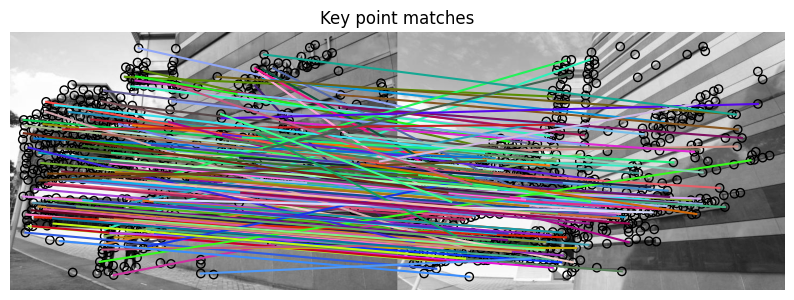

In [3]:
from skimage.feature import match_descriptors, plot_matches
import matplotlib.pyplot as plt

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plot_matches(ax, im1, im2, keypoints1, keypoints2, matches12)
ax.axis('off')
ax.set_title("Key point matches")

plt.show()

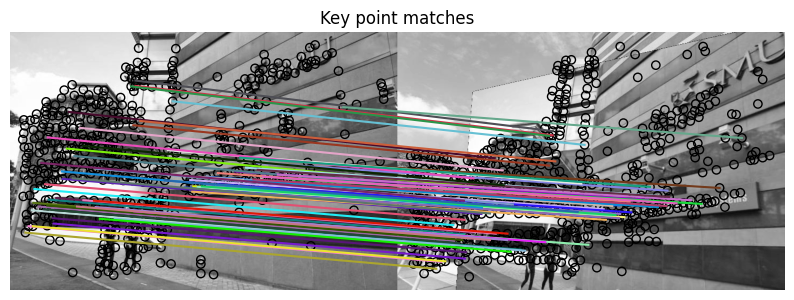

In [12]:
from skimage.transform import ProjectiveTransform
from skimage.measure import ransac

src = keypoints1[matches12[:, 0]]
dst = keypoints2[matches12[:, 1]]

model, inliers = ransac((src, dst),
                        ProjectiveTransform,
                        min_samples=8,
                        residual_threshold=3,
                        max_trials=300,
                        # random_state=np.random.default_rng(0)
                        )

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

match_inliers = matches12[inliers]
plot_matches(ax, im1, im2, keypoints1, keypoints2, match_inliers)

ax.axis('off')
ax.set_title("Key point matches")

plt.show()

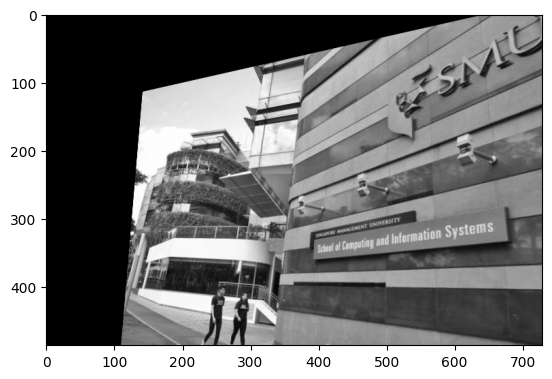

In [5]:
from skimage.transform import warp, ProjectiveTransform

projective = ProjectiveTransform()
m = matches12[inliers]
projective.estimate(keypoints2[m[:,1]], keypoints1[m[:,0]])
warped = warp(im1, projective, output_shape=im2.shape)

plt.imshow(warped, cmap='gray')
plt.show()

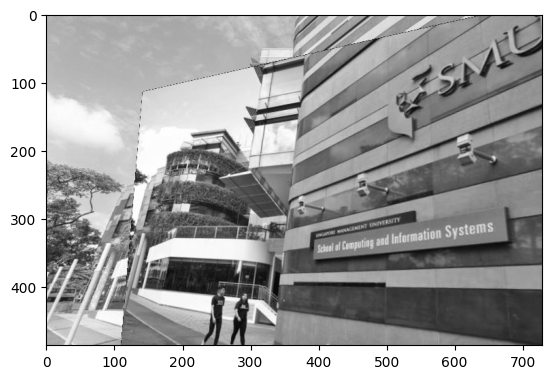

In [6]:
blank = warped == 0
im2[~blank] = warped[~blank]
plt.imshow(im2, cmap=plt.cm.gray)
plt.show()